# Имитационная модель радиочастотной идентификации
В данном ноутбуке проведен имитационный эксперимент по радиочастототной идентификации транспортных средств. 
Для начала импортируем необходимые нам библиотеки:

In [12]:
%load_ext autoreload

%autoreload 2

from tqdm import tqdm
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import namedtuple

from model import model
from model import variables
from model import snr_to_ber

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
snr = snr_to_ber.get_snr(-78, 4, 546875e-10, 64/(3*1875e-8))

In [8]:
snr_to_ber.ber_over_awgn(snr)

0.010058344678682109

In [10]:
MODEL_RES_BER0015_TID_OFF_TEST = [model.run_model(v, 2, True, 12.5, 2, 0, -78) for v in tqdm(range(50, 55, 2))]

100%|██████████| 3/3 [00:31<00:00, 10.59s/it]


In [347]:
MODEL_RES_BER0015_TID_OFF_TEST

[ProbRet(ber=0.2309099901938729, velocity=50, probability=0.0, num_cars=1.0, num_rounds=23.408, round_duration=0.0011774150256485933),
 ProbRet(ber=0.2309099901938729, velocity=52, probability=0.0, num_cars=1.0, num_rounds=22.760333333333328, round_duration=0.0011769823489778844),
 ProbRet(ber=0.2309099901938729, velocity=54, probability=0.0, num_cars=1.0, num_rounds=21.913333333333334, round_duration=0.0011764167170259059)]

In [11]:
MODEL_RES_BER0015_TID_OFF_TEST

[ProbRet(ber=0.010259412760686218, velocity=50, probability=0.6566666666666667, num_cars=1.0, num_rounds=16.042, round_duration=0.0011892180323281483),
 ProbRet(ber=0.010259412760686218, velocity=52, probability=0.6423333333333333, num_cars=1.0, num_rounds=15.405333333333335, round_duration=0.001188178283554972),
 ProbRet(ber=0.010259412760686218, velocity=54, probability=0.62, num_cars=1.0, num_rounds=14.853333333333332, round_duration=0.0011871900962428497)]

In [2]:
MODEL_RES_BER0015_TID_OFF = [model.run_model(v, 0.015, 2, False, 6.25, 1, 1) for v in tqdm(range(5, 40, 2))]
MODEL_RES_BER002_TID_OFF = [model.run_model(v, 0.02, 2, False, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER003_TID_OFF = [model.run_model(v, 0.03, 2, False, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER0035_TID_OFF = [model.run_model(v, 0.035, 2, False, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER004_TID_OFF = [model.run_model(v, 0.04, 2, False, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER0045_TID_OFF = [model.run_model(v, 0.045, 2, False, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER005_TID_OFF = [model.run_model(v, 0.05, 2, False, 6.25, 1, 1) for v in range(5, 40, 2)]

MODEL_RES_BER0015_TID_ON = [model.run_model(v, 0.015, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER002_TID_ON = [model.run_model(v, 0.02, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER003_TID_ON = [model.run_model(v, 0.03, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER0035_TID_ON = [model.run_model(v, 0.035, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER004_TID_ON = [model.run_model(v, 0.04, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER0045_TID_ON = [model.run_model(v, 0.045, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER005_TID_ON = [model.run_model(v, 0.05, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]

MODEL_RES_BER003_TID_ON_Q1 = [model.run_model(v, 0.03, 1, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER003_TID_ON_Q2 = [model.run_model(v, 0.03, 2, True, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER003_TID_ON_Q3 = [model.run_model(v, 0.03, 3, True, 6.25, 1, 1) for v in range(5, 40, 2)]


MODEL_RES_BER003_TID_OFF_Q1 = [model.run_model(v, 0.03, 1, False, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER003_TID_OFF_Q2 = [model.run_model(v, 0.03, 2, False, 6.25, 1, 1) for v in range(5, 40, 2)]
MODEL_RES_BER003_TID_OFF_Q3= [model.run_model(v, 0.03, 3, False, 6.25, 1, 1) for v in range(5, 40, 2)]

100%|██████████| 18/18 [08:29<00:00, 28.28s/it]


In [98]:
with open('output.csv', 'w') as f:
    w = csv.writer(f)
    w.writerow(('probability', 'number of cars', 'number of rounds', 'round duration'))    # field header
    w.writerows([(v.probability, v.num_cars, v.num_rounds, v.round_duration) for v in MODEL_RES_BER0015_TID_OFF])

In [95]:
MODEL_RES_BER0015_TID_OFF

[ProbRet(probability=1.0, num_cars=1.5105434193724083, num_rounds=1046.4833333333333, round_duration=0.0014722776402037688),
 ProbRet(probability=1.0, num_cars=1.112115695524107, num_rounds=836.9226666666667, round_duration=0.0013351133954725507),
 ProbRet(probability=1.0, num_cars=1.0, num_rounds=685.6546666666668, round_duration=0.0011752766639481396),
 ProbRet(probability=1.0, num_cars=1.0, num_rounds=560.9920000000001, round_duration=0.0010328138284586774),
 ProbRet(probability=1.0, num_cars=1.0, num_rounds=474.72533333333337, round_duration=0.0009521692343818463),
 ProbRet(probability=1.0, num_cars=1.0, num_rounds=411.494, round_duration=0.000900197807774784),
 ProbRet(probability=1.0, num_cars=1.0, num_rounds=363.04366666666664, round_duration=0.0008640974340409721),
 ProbRet(probability=1.0, num_cars=1.0, num_rounds=324.89866666666666, round_duration=0.0008373732524922373),
 ProbRet(probability=1.0, num_cars=1.0, num_rounds=294.02366666666666, round_duration=0.000816847325194782

In [94]:
ber15tidoff

,
0,"(1.0, 1.5105434193724083, 1046.4833333333333, ..."
1,"(1.0, 1.112115695524107, 836.9226666666667, 0...."
2,"(1.0, 1.0, 685.6546666666668, 0.00117527666394..."
3,"(1.0, 1.0, 560.9920000000001, 0.00103281382845..."
4,"(1.0, 1.0, 474.72533333333337, 0.0009521692343..."
5,"(1.0, 1.0, 411.494, 0.000900197807774784)"
6,"(1.0, 1.0, 363.04366666666664, 0.0008640974340..."
7,"(1.0, 1.0, 324.89866666666666, 0.0008373732524..."
8,"(1.0, 1.0, 294.02366666666666, 0.0008168473251..."
9,"(1.0, 1.0, 268.3976666666667, 0.00080067521369..."


In [65]:
probability_003ber_tid_off = [p.probability for p in MODEL_RES_BER003_TID_OFF]
probability_0035ber_tid_off = [p.probability for p in MODEL_RES_BER0035_TID_OFF]
probability_004ber_tid_off = [p.probability for p in MODEL_RES_BER004_TID_OFF]
probability_0045ber_tid_off = [p.probability for p in MODEL_RES_BER0045_TID_OFF]
probability_005ber_tid_off = [p.probability for p in MODEL_RES_BER005_TID_OFF]

In [63]:
probability_0015ber_tid_on = [p.probability for p in MODEL_RES_BER0015_TID_ON]
probability_002ber_tid_on = [p.probability for p in MODEL_RES_BER002_TID_ON]
probability_003ber_tid_on = [p.probability for p in MODEL_RES_BER003_TID_ON]
probability_0035ber_tid_on = [p.probability for p in MODEL_RES_BER0035_TID_ON]
probability_004ber_tid_on = [p.probability for p in MODEL_RES_BER004_TID_ON]
probability_0045ber_tid_on = [p.probability for p in MODEL_RES_BER0045_TID_ON]
probability_005ber_tid_on = [p.probability for p in MODEL_RES_BER005_TID_ON]

In [64]:
probability_q1_003ber_tid_on = [p.probability for p in MODEL_RES_BER003_TID_ON_Q1]
probability_q2_003ber_tid_on = [p.probability for p in MODEL_RES_BER003_TID_ON_Q2]
probability_q3_003ber_tid_on = [p.probability for p in MODEL_RES_BER003_TID_ON_Q3]

In [36]:
probability_q1_003ber_tid_off = [p.probability for p in MODEL_RES_BER003_TID_OFF_Q1]
probability_q2_003ber_tid_off = [p.probability for p in MODEL_RES_BER003_TID_OFF_Q2]
probability_q3_003ber_tid_off = [p.probability for p in MODEL_RES_BER003_TID_OFF_Q3]

In [38]:
duration_q1_003ber_tid_off = [p.round_duration for p in MODEL_RES_BER003_TID_OFF_Q1]
duration_q2_003ber_tid_off = [p.round_duration for p in MODEL_RES_BER003_TID_OFF_Q2]
duration_q3_003ber_tid_off = [p.round_duration for p in MODEL_RES_BER003_TID_OFF_Q3]

In [45]:
duration_q1_003ber_tid_on = [p.round_duration for p in MODEL_RES_BER003_TID_ON_Q1]
duration_q2_003ber_tid_on = [p.round_duration for p in MODEL_RES_BER003_TID_ON_Q2]
duration_q3_003ber_tid_on = [p.round_duration for p in MODEL_RES_BER003_TID_ON_Q3]

In [66]:
v = [v for v in range(5, 40, 2)]

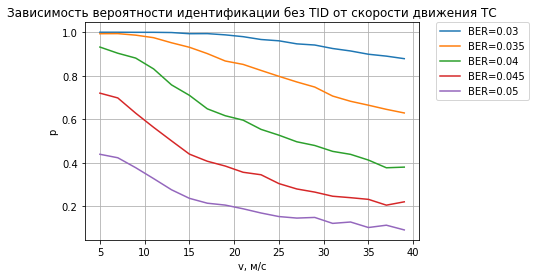

In [67]:
ax = plt.subplot()
line_ber003 = ax.plot(v, probability_003ber_tid_off, label='BER=0.03')
line_ber0035 = ax.plot(v, probability_0035ber_tid_off, label='BER=0.035')
line_ber004 = ax.plot(v, probability_004ber_tid_off, label='BER=0.04')
line_ber0045 = ax.plot(v, probability_0045ber_tid_off, label='BER=0.045')
line_ber005 = ax.plot(v, probability_005ber_tid_off, label='BER=0.05')
leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Зависимость вероятности идентификации без TID от скорости движения ТС')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
plt.show()

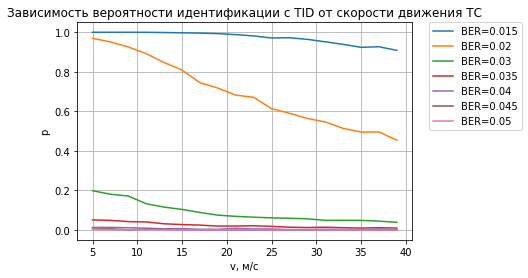

In [68]:
ax = plt.subplot()
line_ber0015 = ax.plot(v, probability_0015ber_tid_on, label='BER=0.015')
line_ber002 = ax.plot(v, probability_002ber_tid_on, label='BER=0.02')
line_ber003 = ax.plot(v, probability_003ber_tid_on, label='BER=0.03')
line_ber0035 = ax.plot(v, probability_0035ber_tid_on, label='BER=0.035')
line_ber004 = ax.plot(v, probability_004ber_tid_on, label='BER=0.04')
line_ber0045 = ax.plot(v, probability_0045ber_tid_on, label='BER=0.045')
line_ber005 = ax.plot(v, probability_005ber_tid_on, label='BER=0.05')
leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Зависимость вероятности идентификации с TID от скорости движения ТС')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
plt.show()

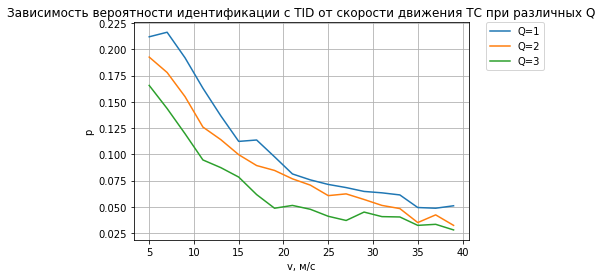

In [35]:
ax = plt.subplot()
line_q1 = ax.plot(v, probability_q1_003ber_tid_on, label='Q=1')
line_q2 = ax.plot(v, probability_q2_003ber_tid_on, label='Q=2')
line_q3 = ax.plot(v, probability_q3_003ber_tid_on, label='Q=3')
leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Зависимость вероятности идентификации с TID от скорости движения ТС при различных Q')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
plt.show()

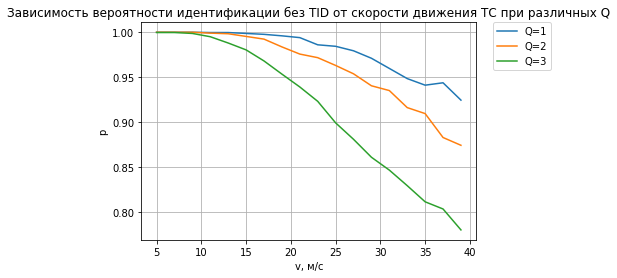

In [37]:
ax = plt.subplot()
line_q1 = ax.plot(v, probability_q1_003ber_tid_off, label='Q=1')
line_q2 = ax.plot(v, probability_q2_003ber_tid_off, label='Q=2')
line_q3 = ax.plot(v, probability_q3_003ber_tid_off, label='Q=3')
leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Зависимость вероятности идентификации без TID от скорости движения ТС при различных Q')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
plt.show()

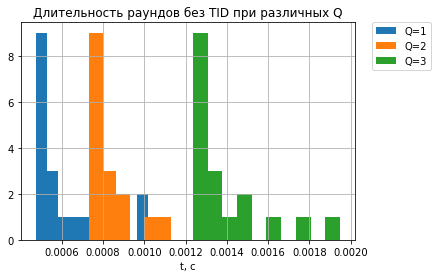

In [44]:
ax = plt.subplot()
line_q1 = ax.hist(duration_q1_003ber_tid_off, label='Q=1')
line_q2 = ax.hist(duration_q2_003ber_tid_off, label='Q=2')
line_q3 = ax.hist(duration_q3_003ber_tid_off, label='Q=3')
leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Длительность раундов без TID при различных Q')
ax.set_xlabel('t, с')
plt.show()

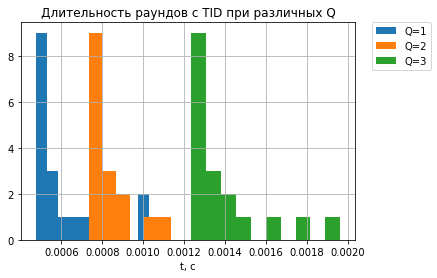

In [56]:
ax = plt.subplot()
line_q1 = ax.hist(duration_q1_003ber_tid_on, label='Q=1')
line_q2 = ax.hist(duration_q2_003ber_tid_on, label='Q=2')
line_q3 = ax.hist(duration_q3_003ber_tid_on, label='Q=3')
leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Длительность раундов c TID при различных Q')
ax.set_xlabel('t, с')
plt.show()

In [846]:
BER = 0.03
Q = 2
L = 2
M = 4

micro = 10 ** (-6)
Tari = 6.25 * micro #6.25
TRcal = 3 * Tari
BLF = 64 / (3 * TRcal)
Tpri = 1 / BLF
RTcal = 2.75 * Tari
T1 = max(RTcal, 10 * Tpri) * 1.1 + 2 * micro
T2 = 20 * Tpri
T3 = T1


QUERY_LENGTH = 22
QREP_LENGTH = 4
RN16_LENGTH = 16
ACK_LENGTH = 18
EPCID_LENGTH = 128
TID_LENGTH = 64 + 1 + 16 + 16 # include CRC16 and RN16
REQ_RN_LENGTH = 40
NEW_RN16_LENGTH = 32 # +CRC16
READ_LENGTH = 58
READER_BITRATE = 2 / RTcal
tag_bitrate = BLF / M

T_SYNC_PREAMBLE = 12.5 * micro + Tari + RTcal
T_FULL_PREAMBLE = T_SYNC_PREAMBLE + TRcal
TAG_PREAMBLE_LEN = 10  # 6 FM0 with TRext=0

T_QUERY = (QUERY_LENGTH / READER_BITRATE) + T_FULL_PREAMBLE
T_QREP = (QREP_LENGTH / READER_BITRATE) + T_SYNC_PREAMBLE
T_ACK = (ACK_LENGTH / READER_BITRATE) + T_SYNC_PREAMBLE
T_REQ_RN16 = (NEW_RN16_LENGTH / READER_BITRATE) + T_SYNC_PREAMBLE
T_READ = (READ_LENGTH / READER_BITRATE) + T_SYNC_PREAMBLE
T_RN16 = (RN16_LENGTH + TAG_PREAMBLE_LEN + 1) / BLF  # + 1 - for end-of-signalling (suffix)
T_NEW_RN16 = (NEW_RN16_LENGTH + TAG_PREAMBLE_LEN + 1) / BLF
T_EPCID = (EPCID_LENGTH + TAG_PREAMBLE_LEN + 1) / BLF  # + 1 - -//-//-
T_TID = (TID_LENGTH + TAG_PREAMBLE_LEN + 1) / BLF


T_EMPTY_SLOT = T_QREP + T1 + T3
T_SUCCESS_SLOT = T_QREP + T1 + T_RN16 + T2 + T_ACK + T1 + T_EPCID + T2
T_INVALID_RN16 = T_QREP + T1 + T_RN16 + T2 + T_ACK + T1 + T3
T_COLLIDED_SLOT = T_QREP + T1 + T_RN16 + T2
T_SUCCESS_TID = T_REQ_RN16 + T1 + T_NEW_RN16 + T2 + T_READ + T1 +T_TID + T2
T_INVALID_NEW_RN16 = T_REQ_RN16 + T1 + T_NEW_RN16 + T2

snr = snr_to_ber.get_snr(rx_power=-78 ,m=4,
                             preamble_duration=TAG_PREAMBLE_LEN/tag_bitrate,
                             blf=BLF)
BER = snr_to_ber.ber_over_awgn(snr)


def probability(v, L, Q, TID = True):
    A = (1 - BER) ** 16
    B = (1 - BER) ** 128
    C = (1 - BER) ** 32
    D = (1 - BER) ** 97
    

    P_RN16 = 1 - A
    P_EPC_er = A * (1 - B)

    P_EPC_ok = A * B
    P_Handle = A * B * (1 - C)
    P_TID_er = A * B * C * (1 - D)
    P_TID_ok = A * B * C * D
    #P0 = P_RN16 * P_EPC_er * P_Handle * P_TID_er
    P0_TID = A * B * C * D
    P0_EPC = A * B

    t_INVALID_RN16 = T_QUERY + ((2 ** Q) - 1)*T_EMPTY_SLOT + T_INVALID_RN16 - T_QREP
    t_SUCCESS_EPC = T_QUERY + ((2 ** Q) - 1)*T_EMPTY_SLOT + T_SUCCESS_SLOT - T_QREP
    t_handle = t_SUCCESS_EPC + T_INVALID_NEW_RN16
    t_TID_er = t_SUCCESS_EPC + T_SUCCESS_TID
    t_TID_ok = t_TID_er
    

    
    if TID == True:
        t_mean = P_RN16*t_INVALID_RN16 + P_EPC_er*t_SUCCESS_EPC + P_Handle*t_handle + P_TID_er*t_TID_er + P_TID_ok*t_TID_ok
        T = t_TID_ok
        P0 = A * B * C * D
        n = (L / v) / t_mean
        p = 1 - ((1 - P_TID_ok) ** n)
    else:
        t_mean = P_RN16*t_INVALID_RN16 + P_EPC_er*t_SUCCESS_EPC + P_EPC_ok*t_SUCCESS_EPC
        T = t_SUCCESS_EPC
        P0 = A * B
        n = (L / v) / t_mean
        p = 1 - ((1 - P_EPC_ok) ** n)

    i = 0
    p_new = 0
    while i < ((L/v - T) / t_mean):
        p_new += P0 * ((1 - P0) ** i)
        i += 1
    
    p_new2 = 1 - (1 - P0) ** ((L/v - T) / t_mean)
        
    return p_new2, p, p_new

In [847]:
probability(v=50, L=2, Q=2, TID=True)

(0.8646347286341095, 0.8784860666715086, 0.8697034136689994)

In [844]:
prob_theor_tid_003 = [probability(v, 2, 2, True) for v in range(5, 55, 2)]
prob_theor_epc_003 = [probability(v, 2, 2, False) for v in range(5, 55, 2)]

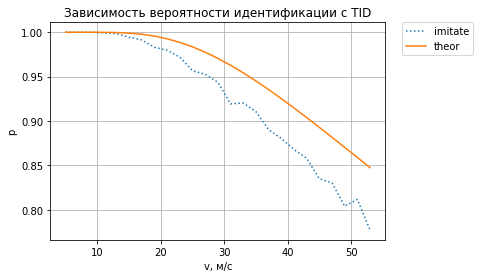

In [845]:
ax = plt.subplot()

line_ber003 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_4, label='imitate', linestyle=':')
line_ber003_theor = ax.plot(v, prob_theor_tid_003, label='theor')

leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Зависимость вероятности идентификации с TID')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
plt.show()

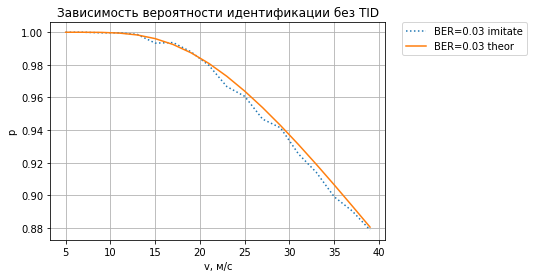

In [77]:
ax = plt.subplot()

line_ber003 = ax.plot(v, probability_003ber_tid_off, label='BER=0.03 imitate', linestyle=':')
line_ber003_theor = ax.plot(v, prob_theor_epc_003, label='BER=0.03 theor')

leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('Зависимость вероятности идентификации без TID')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
plt.show()

In [356]:
MODEL_RES_SNR75_TID_ON_TARI_625_M_1 = [model.run_model(v, 2, True, 6.25, 1, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_625_M_2 = [model.run_model(v, 2, True, 6.25, 2, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_625_M_3 = [model.run_model(v, 2, True, 6.25, 4, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_625_M_4 = [model.run_model(v, 2, True, 6.25, 8, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_125_M_1 = [model.run_model(v, 2, True, 12.5, 1, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_125_M_2 = [model.run_model(v, 2, True, 12.5, 2, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_125_M_3 = [model.run_model(v, 2, True, 12.5, 4, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_125_M_4 = [model.run_model(v, 2, True, 12.5, 8, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_1875_M_1 = [model.run_model(v, 2, True, 18.75, 1, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_1875_M_2 = [model.run_model(v, 2, True, 18.75, 2, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_1875_M_3 = [model.run_model(v, 2, True, 18.75, 4, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_1875_M_4 = [model.run_model(v, 2, True, 18.75, 8, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_25_M_1 = [model.run_model(v, 2, True, 25, 1, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_25_M_2 = [model.run_model(v, 2, True, 25, 2, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_25_M_3 = [model.run_model(v, 2, True, 25, 4, 0, -75) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR75_TID_ON_TARI_25_M_4 = [model.run_model(v, 2, True, 25, 8, 0, -75) for v in tqdm(range(5, 55, 2))]

MODEL_RES_SNR78_TID_ON_TARI_625_M_1 = [model.run_model(v, 2, True, 6.25, 1, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_625_M_2 = [model.run_model(v, 2, True, 6.25, 2, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_625_M_3 = [model.run_model(v, 2, True, 6.25, 4, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_625_M_4 = [model.run_model(v, 2, True, 6.25, 8, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_125_M_1 = [model.run_model(v, 2, True, 12.5, 1, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_125_M_2 = [model.run_model(v, 2, True, 12.5, 2, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_125_M_3 = [model.run_model(v, 2, True, 12.5, 4, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_125_M_4 = [model.run_model(v, 2, True, 12.5, 8, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_1875_M_1 = [model.run_model(v, 2, True, 18.75, 1, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_1875_M_2 = [model.run_model(v, 2, True, 18.75, 2, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_1875_M_3 = [model.run_model(v, 2, True, 18.75, 4, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_1875_M_4 = [model.run_model(v, 2, True, 18.75, 8, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_25_M_1 = [model.run_model(v, 2, True, 25, 1, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_25_M_2 = [model.run_model(v, 2, True, 25, 2, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_25_M_3 = [model.run_model(v, 2, True, 25, 4, 0, -78) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR78_TID_ON_TARI_25_M_4 = [model.run_model(v, 2, True, 25, 8, 0, -78) for v in tqdm(range(5, 55, 2))]

MODEL_RES_SNR80_TID_ON_TARI_625_M_1 = [model.run_model(v, 2, True, 6.25, 1, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_625_M_2 = [model.run_model(v, 2, True, 6.25, 2, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_625_M_3 = [model.run_model(v, 2, True, 6.25, 4, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_625_M_4 = [model.run_model(v, 2, True, 6.25, 8, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_125_M_1 = [model.run_model(v, 2, True, 12.5, 1, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_125_M_2 = [model.run_model(v, 2, True, 12.5, 2, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_125_M_3 = [model.run_model(v, 2, True, 12.5, 4, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_125_M_4 = [model.run_model(v, 2, True, 12.5, 8, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_1875_M_1 = [model.run_model(v, 2, True, 18.75, 1, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_1875_M_2 = [model.run_model(v, 2, True, 18.75, 2, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_1875_M_3 = [model.run_model(v, 2, True, 18.75, 4, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_1875_M_4 = [model.run_model(v, 2, True, 18.75, 8, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_25_M_1 = [model.run_model(v, 2, True, 25, 1, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_25_M_2 = [model.run_model(v, 2, True, 25, 2, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_25_M_3 = [model.run_model(v, 2, True, 25, 4, 0, -80) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR80_TID_ON_TARI_25_M_4 = [model.run_model(v, 2, True, 25, 8, 0, -80) for v in tqdm(range(5, 55, 2))]

MODEL_RES_SNR83_TID_ON_TARI_625_M_1 = [model.run_model(v, 2, True, 6.25, 1, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_625_M_2 = [model.run_model(v, 2, True, 6.25, 2, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_625_M_3 = [model.run_model(v, 2, True, 6.25, 4, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_625_M_4 = [model.run_model(v, 2, True, 6.25, 8, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_125_M_1 = [model.run_model(v, 2, True, 12.5, 1, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_125_M_2 = [model.run_model(v, 2, True, 12.5, 2, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_125_M_3 = [model.run_model(v, 2, True, 12.5, 4, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_125_M_4 = [model.run_model(v, 2, True, 12.5, 8, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_1875_M_1 = [model.run_model(v, 2, True, 18.75, 1, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_1875_M_2 = [model.run_model(v, 2, True, 18.75, 2, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_1875_M_3 = [model.run_model(v, 2, True, 18.75, 4, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_1875_M_4 = [model.run_model(v, 2, True, 18.75, 8, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_25_M_1 = [model.run_model(v, 2, True, 25, 1, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_25_M_2 = [model.run_model(v, 2, True, 25, 2, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_25_M_3 = [model.run_model(v, 2, True, 25, 4, 0, -83) for v in tqdm(range(5, 55, 2))]
MODEL_RES_SNR83_TID_ON_TARI_25_M_4 = [model.run_model(v, 2, True, 25, 8, 0, -83) for v in tqdm(range(5, 55, 2))]

100%|██████████| 25/25 [03:17<00:00,  7.91s/it]


In [ ]:
MODEL_RES_SNR75_TID_ON_TARI_625_M_1 = [model.run_model(v, 2, True, 6.25, 1, 0, -75) for v in tqdm(range(5, 55, 2))]

In [363]:
PROB_SNR75_TID_ON_TARI_625_M_1 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_625_M_1]
PROB_SNR75_TID_ON_TARI_625_M_2 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_625_M_2]
PROB_SNR75_TID_ON_TARI_625_M_4 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_625_M_3]
ROB_SNR75_TID_ON_TARI_625_M_8 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_625_M_4]
PROB_SNR75_TID_ON_TARI_125_M_1 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_125_M_1]
PROB_SNR75_TID_ON_TARI_125_M_2 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_125_M_2]
PROB_SNR75_TID_ON_TARI_125_M_4 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_125_M_3]
PROB_SNR75_TID_ON_TARI_125_M_8 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_125_M_4]
PROB_SNR75_TID_ON_TARI_1875_M_1 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_1875_M_1]
PROB_SNR75_TID_ON_TARI_1875_M_2 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_1875_M_2]
PROB_SNR75_TID_ON_TARI_1875_M_4 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_1875_M_3]
PROB_SNR75_TID_ON_TARI_1875_M_8 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_1875_M_4]
PROB_SNR75_TID_ON_TARI_25_M_1 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_25_M_1]
PROB_SNR75_TID_ON_TARI_25_M_2 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_25_M_2]
PROB_SNR75_TID_ON_TARI_25_M_4 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_25_M_3]
PROB_SNR75_TID_ON_TARI_25_M_8 = [p.probability for p in MODEL_RES_SNR75_TID_ON_TARI_25_M_4]

In [366]:
PROB_SNR78_TID_ON_TARI_625_M_1 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_625_M_1]
PROB_SNR78_TID_ON_TARI_625_M_2 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_625_M_2]
PROB_SNR78_TID_ON_TARI_625_M_4 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_625_M_3]
PROB_SNR78_TID_ON_TARI_625_M_8 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_625_M_4]
PROB_SNR78_TID_ON_TARI_125_M_1 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_125_M_1]
PROB_SNR78_TID_ON_TARI_125_M_2 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_125_M_2]
PROB_SNR78_TID_ON_TARI_125_M_4 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_125_M_3]
PROB_SNR78_TID_ON_TARI_125_M_8 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_125_M_4]
PROB_SNR78_TID_ON_TARI_1875_M_1 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_1875_M_1]
PROB_SNR78_TID_ON_TARI_1875_M_2 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_1875_M_2]
PROB_SNR78_TID_ON_TARI_1875_M_4 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_1875_M_3]
PROB_SNR78_TID_ON_TARI_1875_M_8 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_1875_M_4]
PROB_SNR78_TID_ON_TARI_25_M_1 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_25_M_1]
PROB_SNR78_TID_ON_TARI_25_M_2 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_25_M_2]
PROB_SNR78_TID_ON_TARI_25_M_4 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_25_M_3]
PROB_SNR78_TID_ON_TARI_25_M_8 = [p.probability for p in MODEL_RES_SNR78_TID_ON_TARI_25_M_4]

In [371]:
PROB_SNR80_TID_ON_TARI_625_M_1 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_625_M_1]
PROB_SNR80_TID_ON_TARI_625_M_2 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_625_M_2]
PROB_SNR80_TID_ON_TARI_625_M_4 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_625_M_3]
PROB_SNR80_TID_ON_TARI_625_M_8 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_625_M_4]
PROB_SNR80_TID_ON_TARI_125_M_1 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_125_M_1]
PROB_SNR80_TID_ON_TARI_125_M_2 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_125_M_2]
PROB_SNR80_TID_ON_TARI_125_M_4 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_125_M_3]
PROB_SNR80_TID_ON_TARI_125_M_8 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_125_M_4]
PROB_SNR80_TID_ON_TARI_1875_M_1 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_1875_M_1]
PROB_SNR80_TID_ON_TARI_1875_M_2 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_1875_M_2]
PROB_SNR80_TID_ON_TARI_1875_M_4 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_1875_M_3]
PROB_SNR80_TID_ON_TARI_1875_M_8 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_1875_M_4]
PROB_SNR80_TID_ON_TARI_25_M_1 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_25_M_1]
PROB_SNR80_TID_ON_TARI_25_M_2 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_25_M_2]
PROB_SNR80_TID_ON_TARI_25_M_4 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_25_M_3]
PROB_SNR80_TID_ON_TARI_25_M_8 = [p.probability for p in MODEL_RES_SNR80_TID_ON_TARI_25_M_4]

In [378]:
PROB_SNR83_TID_ON_TARI_625_M_1 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_625_M_1]
PROB_SNR83_TID_ON_TARI_625_M_2 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_625_M_2]
PROB_SNR83_TID_ON_TARI_625_M_4 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_625_M_3]
PROB_SNR83_TID_ON_TARI_625_M_8 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_625_M_4]
PROB_SNR83_TID_ON_TARI_125_M_1 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_125_M_1]
PROB_SNR83_TID_ON_TARI_125_M_2 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_125_M_2]
PROB_SNR83_TID_ON_TARI_125_M_4 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_125_M_3]
PROB_SNR83_TID_ON_TARI_125_M_8 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_125_M_4]
PROB_SNR83_TID_ON_TARI_1875_M_1 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_1875_M_1]
PROB_SNR83_TID_ON_TARI_1875_M_2 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_1875_M_2]
PROB_SNR83_TID_ON_TARI_1875_M_4 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_1875_M_3]
PROB_SNR83_TID_ON_TARI_1875_M_8 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_1875_M_4]
PROB_SNR83_TID_ON_TARI_25_M_1 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_25_M_1]
PROB_SNR83_TID_ON_TARI_25_M_2 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_25_M_2]
PROB_SNR83_TID_ON_TARI_25_M_4 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_25_M_3]
PROB_SNR83_TID_ON_TARI_25_M_8 = [p.probability for p in MODEL_RES_SNR83_TID_ON_TARI_25_M_4]

In [364]:
PROB_SNR75_TID_ON_TARI_625_M_1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

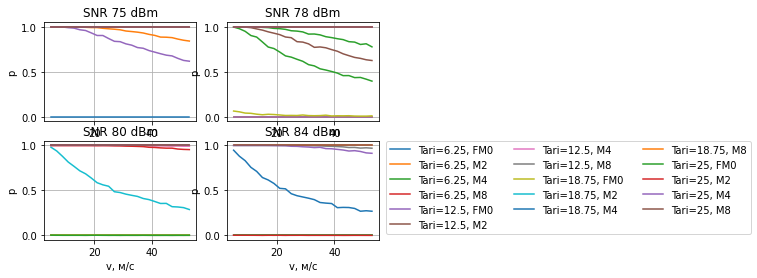

In [388]:
ax = plt.subplot(2,2,1)
v = [v for v in range(5, 55, 2)]
line_snr75_1 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_1, label='Tari=6.25, FM0')
line_snr75_2 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_2, label='Tari=6.25, M2')
line_snr75_3 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_4, label='Tari=6.25, M4')
line_snr75_4 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_8, label='Tari=6.25, M8')
line_snr75_5 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr75_6 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr75_7 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr75_8 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')
line_snr75_9 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr75_10 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr75_11 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr75_12 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')
line_snr75_13 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr75_14 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr75_15 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr75_16 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -75 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')


ax = plt.subplot(2,2,2)
line_snr78_1 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_1, label='Tari=6.25, FM0')
line_snr78_2 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_2, label='Tari=6.25, M2')
line_snr78_3 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_4, label='Tari=6.25, M4')
line_snr78_4 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_8, label='Tari=6.25, M8')
line_snr78_5 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr78_6 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr78_7 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr78_8 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')
line_snr78_9 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr78_10 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr78_11 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr78_12 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')
line_snr78_13 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr78_14 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr78_15 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr78_16 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -78 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,3)
line_snr80_1 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_1, label='Tari=6.25, FM0')
line_snr80_2 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_2, label='Tari=6.25, M2')
line_snr80_3 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_4, label='Tari=6.25, M4')
line_snr80_4 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_8, label='Tari=6.25, M8')
line_snr80_5 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr80_6 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr80_7 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr80_8 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')
line_snr80_9 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr80_10 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr80_11 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr80_12 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')
line_snr80_13 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr80_14 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr80_15 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr80_16 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -80 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,4)
line_snr83_1 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_1, label='Tari=6.25, FM0')
line_snr83_2 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_2, label='Tari=6.25, M2')
line_snr83_3 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_4, label='Tari=6.25, M4')
line_snr83_4 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_8, label='Tari=6.25, M8')
line_snr83_5 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr83_6 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr83_7 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr83_8 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')
line_snr83_9 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr83_10 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr83_11 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr83_12 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')
line_snr83_13 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr83_14 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr83_15 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr83_16 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -84 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.,ncol = 3)
plt.tight_layout()
plt.show()

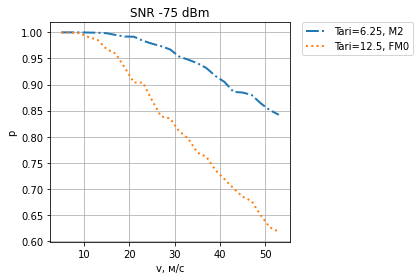

In [416]:
ax = plt.subplot()
v = [v for v in range(5, 55, 2)]
line_snr75_1 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_1, linestyle = '--',
        linewidth = 2, label='Tari=6.25, FM0')
line_snr75_2 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_2, linestyle = '-.',
        linewidth = 2, label='Tari=6.25, M2')
line_snr75_3 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_4, linestyle = ':',
        linewidth = 2, label='Tari=6.25, M4')
line_snr75_4 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_8, label='Tari=6.25, M8')
line_snr75_5 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_1, linestyle = ':', linewidth = 2, label='Tari=12.5, FM0')
line_snr75_6 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_2, marker = 's', label='Tari=12.5, M2')
line_snr75_7 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_4, marker = '^', label='Tari=12.5, M4')
line_snr75_8 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_8, marker = 'v',label='Tari=12.5, M8')
line_snr75_9 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_1, marker = '*', label='Tari=18.75, FM0')
line_snr75_10 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_2, marker = '+', label='Tari=18.75, M2')
line_snr75_11 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_4, marker = '|', label='Tari=18.75, M4')
line_snr75_12 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')
line_snr75_13 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr75_14 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr75_15 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr75_16 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_8, label='Tari=25, M8')
leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -75 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.,ncol = 1)
plt.tight_layout()
plt.show()

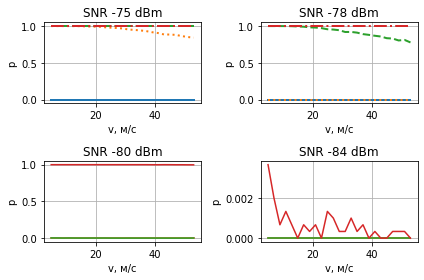

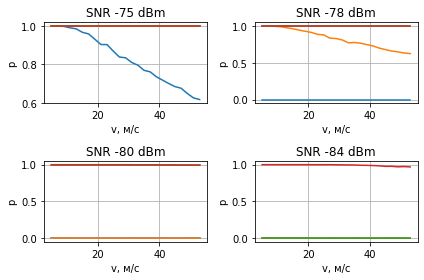

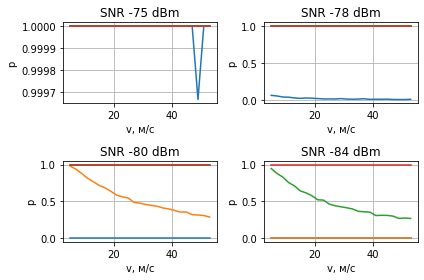

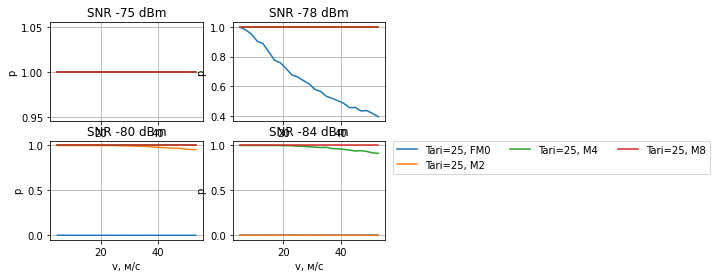

In [430]:
ax = plt.subplot(2,2,1)
v = [v for v in range(5, 55, 2)]
line_snr75_1 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_1, linestyle = '-',
        linewidth = 2, label='Tari=6.25, FM0')
line_snr75_2 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_2, linestyle = ':',
        linewidth = 2, label='Tari=6.25, M2')
line_snr75_3 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_4, linestyle = '--',
        linewidth = 2,label='Tari=6.25, M4')
line_snr75_4 = ax.plot(v, PROB_SNR75_TID_ON_TARI_625_M_8, linestyle = '-.',
        linewidth = 2,label='Tari=6.25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -75 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')


ax = plt.subplot(2,2,2)
line_snr78_1 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_1, linestyle = '-',
        linewidth = 2, label='Tari=6.25, FM0')
line_snr78_2 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_2, linestyle = ':',
        linewidth = 2, label='Tari=6.25, M2')
line_snr78_3 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_4, linestyle = '--',
        linewidth = 2, label='Tari=6.25, M4')
line_snr78_4 = ax.plot(v, PROB_SNR78_TID_ON_TARI_625_M_8, linestyle = '-.',
        linewidth = 2, label='Tari=6.25, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -78 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,3)
line_snr80_1 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_1, label='Tari=6.25, FM0')
line_snr80_2 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_2, label='Tari=6.25, M2')
line_snr80_3 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_4, label='Tari=6.25, M4')
line_snr80_4 = ax.plot(v, PROB_SNR80_TID_ON_TARI_625_M_8, label='Tari=6.25, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -80 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,4)
line_snr83_1 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_1, label='Tari=6.25, FM0')
line_snr83_2 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_2, label='Tari=6.25, M2')
line_snr83_3 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_4, label='Tari=6.25, M4')
line_snr83_4 = ax.plot(v, PROB_SNR83_TID_ON_TARI_625_M_8, label='Tari=6.25, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -84 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
#ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.,ncol = 3)
plt.tight_layout()
plt.show()
ax = plt.subplot(2,2,1)


line_snr75_5 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr75_6 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr75_7 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr75_8 = ax.plot(v, PROB_SNR75_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -75 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')


ax = plt.subplot(2,2,2)

line_snr78_5 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr78_6 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr78_7 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr78_8 = ax.plot(v, PROB_SNR78_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -78 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,3)

line_snr80_5 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr80_6 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr80_7 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr80_8 = ax.plot(v, PROB_SNR80_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -80 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,4)

line_snr83_5 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_1, label='Tari=12.5, FM0')
line_snr83_6 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_2, label='Tari=12.5, M2')
line_snr83_7 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_4, label='Tari=12.5, M4')
line_snr83_8 = ax.plot(v, PROB_SNR83_TID_ON_TARI_125_M_8, label='Tari=12.5, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -84 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
#ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.,ncol = 3)
plt.tight_layout()
plt.show()
ax = plt.subplot(2,2,1)

line_snr75_9 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr75_10 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr75_11 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr75_12 = ax.plot(v, PROB_SNR75_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -75 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')


ax = plt.subplot(2,2,2)

line_snr78_9 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr78_10 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr78_11 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr78_12 = ax.plot(v, PROB_SNR78_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -78 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,3)

line_snr80_9 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr80_10 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr80_11 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr80_12 = ax.plot(v, PROB_SNR80_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -80 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,4)

line_snr83_9 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_1, label='Tari=18.75, FM0')
line_snr83_10 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_2, label='Tari=18.75, M2')
line_snr83_11 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_4, label='Tari=18.75, M4')
line_snr83_12 = ax.plot(v, PROB_SNR83_TID_ON_TARI_1875_M_8, label='Tari=18.75, M8')

#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -84 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
#ax.legend(bbox_to_anchor=(1.05, 1) ,loc='lower center', borderaxespad=0.,ncol = 3)
plt.tight_layout()
plt.show()

ax = plt.subplot(2,2,1)

line_snr75_13 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr75_14 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr75_15 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr75_16 = ax.plot(v, PROB_SNR75_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -75 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')


ax = plt.subplot(2,2,2)
line_snr78_13 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr78_14 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr78_15 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr78_16 = ax.plot(v, PROB_SNR78_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -78 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,3)
line_snr80_13 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr80_14 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr80_15 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr80_16 = ax.plot(v, PROB_SNR80_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -80 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')

ax = plt.subplot(2,2,4)
line_snr83_13 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_1, label='Tari=25, FM0')
line_snr83_14 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_2, label='Tari=25, M2')
line_snr83_15 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_4, label='Tari=25, M4')
line_snr83_16 = ax.plot(v, PROB_SNR83_TID_ON_TARI_25_M_8, label='Tari=25, M8')
#leg = ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.)
ax.grid()
plt.title('SNR -84 dBm')
ax.set_xlabel('v, м/с')
ax.set_ylabel('p')
ax.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left', borderaxespad=0.,ncol = 3)
plt.tight_layout()
plt.show()

In [445]:
qwe = [0] * 10
qweqwe = qwe
qwe.append(1)

In [447]:
import timeit

In [798]:
NUM_TAGS = 10
list_of_tags = [tag for tag in range(NUM_TAGS)]
time_enter = {tag: 1 * tag for tag in range(NUM_TAGS)}
time_exit = {tag: (10/30) + time_enter[tag] for tag in range(NUM_TAGS)}

In [801]:
def get_tags_in_area(time):
    tags_in_area = []
    delete_first = False
    for tag in list_of_tags:
        if time < time_enter[tag]:
            break
        if time_enter[tag] <= time < time_exit[tag]:
            tags_in_area.append(tag)
        if time >= time_exit[tag]:
            delete_first = True
    if delete_first == True:
        list_of_tags.pop(0)
    return tags_in_area

In [ ]:
def get_old_tags_in_area(time):
    tags_in_area = [tag for tag in range(NUM_TAGS) if (time_enter[tag] <= time < time_exit[tag])]
    return tags_in_area

In [800]:
for time in np.arange(0, 12, 0.2):
    #print(get_tags_in_area(time))
    print(get_tags_in_area(time))

[0]
[0]
[]
[]
[]
[1]
[1]
[]
[]
[]
[2]
[2]
[]
[]
[]
[3]
[3]
[]
[]
[]
[4]
[4]
[]
[]
[]
[5]
[5]
[]
[]
[]
[6]
[6]
[]
[]
[]
[7]
[7]
[]
[]
[]
[8]
[8]
[]
[]
[]
[9]
[9]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [802]:
for time in np.arange(0, 12, 0.2):
    #print(get_tags_in_area(time))
    print(get_old_tags_in_area(time))

[0]
[0]
[]
[]
[]
[1]
[1]
[]
[]
[]
[2]
[2]
[]
[]
[]
[3]
[3]
[]
[]
[]
[4]
[4]
[]
[]
[]
[5]
[5]
[]
[]
[]
[6]
[6]
[]
[]
[]
[7]
[7]
[]
[]
[]
[8]
[8]
[]
[]
[]
[9]
[9]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [808]:
NUM_TAGS = 100
list_of_tags = [tag for tag in range(NUM_TAGS)]
time_enter = {tag: 1 * tag for tag in range(NUM_TAGS)}
time_exit = {tag: (10/2) + time_enter[tag] for tag in range(NUM_TAGS)}
tags_in_area = []

In [792]:
%timeit for time in np.arange(0, 100, 0.2): get_tags_in_area(time)

440 µs ± 93.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [794]:
%timeit for time in np.arange(0, 100, 0.2): get_old_tags_in_area(time)

27.6 ms ± 8.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [807]:
model.run_model(20, 2, True, 12.5, 4, 0, -78)

ProbRet(ber=0.0002711758447826475, velocity=20, probability=0.033333333333333326, num_cars=1.0, num_rounds=0.6173333333333333, round_duration=0.0011651132367332321)

In [823]:
model.run_model(53, 2, True, 12.5, 1, 0, -75)

ProbRet(ber=0.010738368232828449, velocity=53, probability=0.6199999999999999, num_cars=1.0, num_rounds=17.502666666666663, round_duration=0.0011839922881410868)

In [830]:
PROB_SNR78_TID_ON_TARI_625_M_4

[1.0,
 1.0,
 1.0,
 0.9993333333333334,
 0.9983333333333334,
 0.9943333333333334,
 0.9913333333333333,
 0.9830000000000001,
 0.9796666666666667,
 0.9720000000000002,
 0.9566666666666669,
 0.9526666666666668,
 0.9436666666666668,
 0.9193333333333337,
 0.9203333333333333,
 0.910666666666667,
 0.8903333333333336,
 0.8803333333333336,
 0.8680000000000001,
 0.858,
 0.8350000000000003,
 0.8303333333333334,
 0.8039999999999999,
 0.8116666666666665,
 0.7773333333333333]

In [817]:
v

[5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53]

In [1]:
duration_q2_003ber_tid_off

NameError: name 'duration_q2_003ber_tid_off' is not defined

In [2]:
PROB_SNR83_TID_ON_TARI_625_M_2

NameError: name 'PROB_SNR83_TID_ON_TARI_625_M_2' is not defined

In [16]:
list_test = [[v*a for v in range(5)]for a in range(3)]

In [17]:
list_test

[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4], [0, 2, 4, 6, 8]]

In [19]:
MODEL_RES_SNR_RANGE_TID_ON_TARI_625_M_4 = [[model.run_model(v, 2, True, 6.25, 4, 0, snr) for v in tqdm(range(5, 56, 5))]for snr in tqdm(range(-81, -75))]



  0%|          | 0/6 [00:00<?, ?it/s]


  0%|          | 0/11 [00:00<?, ?it/s]


  9%|▉         | 1/11 [00:22<03:41, 22.12s/it]


 18%|█▊        | 2/11 [00:43<03:13, 21.51s/it]


 27%|██▋       | 3/11 [01:04<02:51, 21.45s/it]


 36%|███▋      | 4/11 [01:25<02:28, 21.15s/it]


 45%|████▌     | 5/11 [01:45<02:04, 20.74s/it]


 55%|█████▍    | 6/11 [02:04<01:40, 20.19s/it]


 64%|██████▎   | 7/11 [02:24<01:20, 20.02s/it]


 73%|███████▎  | 8/11 [02:43<00:59, 19.90s/it]


 82%|████████▏ | 9/11 [03:03<00:39, 19.94s/it]


 91%|█████████ | 10/11 [03:22<00:19, 19.66s/it]


100%|██████████| 11/11 [03:41<00:00, 20.16s/it]


 17%|█▋        | 1/6 [03:41<18:29, 221.81s/it]


  0%|          | 0/11 [00:00<?, ?it/s]


  9%|▉         | 1/11 [00:21<03:33, 21.35s/it]


 18%|█▊        | 2/11 [00:41<03:06, 20.69s/it]


 27%|██▋       | 3/11 [01:01<02:43, 20.44s/it]


 36%|███▋      | 4/11 [01:21<02:20, 20.11s/it]


 45%|████▌     | 5/11 [01:40<01:58, 19.69s/it]


 55%|█████▍    | 6/11 [01:58<01:36, 19.36

In [39]:
p = [[p.probability for p in MODEL_RES_SNR_RANGE_TID_ON_TARI_625_M_4[_]] for _ in range(6)]

In [36]:
v = [v for v in range(5, 56, 5)]
snr = [snr for snr in range(-81, -75)]

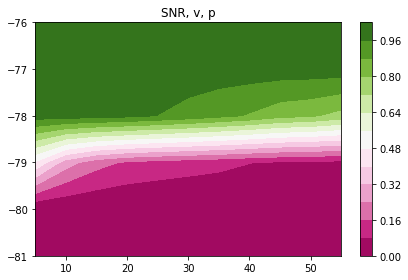

In [54]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
x, y = np.meshgrid(v, snr)
p = np.array(p)
levels = MaxNLocator(nbins=15).tick_values(p.min(), p.max())
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax1) = plt.subplots(nrows=1)




# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x,
                  y, p, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('SNR, v, p')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()
